# LLM Chain 만들기

## 필요 라이브러리
poetry add python-dotenv langchain langchain-openai



In [1]:
from dotenv import load_dotenv
import os
import langchain

load_dotenv(dotenv_path='.env')

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
print(OPENAI_API_KEY[:5])

print(langchain.__version__)

gsk_y
0.3.27


## LLM Chain
### 1) Prompt + LLM

In [4]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    model="meta-llama/llama-4-scout-17b-16e-instruct",  # Spring AI와 동일한 모델
    temperature=0.7   
)

result = llm.invoke("인공지능 모델의 학습원리가 뭐야")
print(result.content)

인공지능 모델의 학습 원리는 주로 기계 학습(Machine Learning)을 기반으로 합니다. 기계 학습은 컴퓨터가 데이터를 분석하고 학습하여, 주어진 작업이나 문제를 해결하는 능력을 갖추도록 하는 방법입니다. 인공지능 모델이 학습하는 과정은 다음과 같은 기본 원리를 따릅니다.

1. **데이터 수집**: 인공지능 모델을 학습시키기 위해서는 관련된 데이터가 필요합니다. 이 데이터는 문제의 성격에 따라 달라지며, 이미지, 텍스트, 소리, 영상 등 다양한 형태가 될 수 있습니다.

2. **데이터 전처리**: 수집된 데이터는 모델에 입력되기 전에 적절한 형태로 변환되어야 합니다. 이 과정에는 데이터의 정리, 변환, 노이즈 제거 등이 포함될 수 있습니다.

3. **모델 선택**: 주어진 문제와 데이터의 특성에 적합한 기계 학습 모델을 선택합니다. 모델의 종류에는 신경망, 결정 트리, 서포트 벡터 머신 등 여러 가지가 있으며, 문제의 성격에 따라 적합한 모델을 선택해야 합니다.

4. **학습**: 선택된 모델에 데이터를 입력하여 모델이 학습할 수 있도록 합니다. 이 과정에서는 모델이 데이터로부터 패턴이나 관계를 발견하고, 이를 통해 주어진 작업을 수행하는 능력을 키우게 됩니다. 학습 과정은 보통 최적화 알고리즘을 통해 모델의 파라미터를 조정하는 방식으로 이루어집니다.

5. **평가**: 학습된 모델의 성능을 평가합니다. 이를 통해 모델이 얼마나 잘 학습되었고, 새로운 데이터에 대해 얼마나 잘 작동하는지 판단할 수 있습니다.

6. **튜닝**: 모델의 성능을 향상시키기 위해 하이퍼파라미터를 조정하거나 모델 구조를 변경하는 등의 작업을 수행합니다.

7. **예측**: 학습되고 평가된 모델을 사용하여 새로운 데이터에 대한 예측이나 분류 작업을 수행합니다.

인공지능 모델의 학습은 반복적인 과정을 통해 지속적으로 개선될 수 있습니다. 더 많은 데이터를 수집하고, 모델을 수정하며, 학습과 평가를 반복함으로써 모델의 성능을 향상시킬 수 있습니다.

특히, 심층 학습(

### 2) PromptTemplate + LLM

In [5]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template("넌 특급 개발자야. {input}에 대해 쉽게 설명해줘.")
print(prompt)


input_variables=['input'] input_types={} partial_variables={} template='넌 특급 개발자야. {input}에 대해 쉽게 설명해줘.'


In [7]:
from langchain_openai import ChatOpenAI

# llm = ChatOpenAI(model="gpt-3.5-turbo-0125")
llm = ChatOpenAI(
    api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    model="meta-llama/llama-4-scout-17b-16e-instruct",  # Spring AI와 동일한 모델
    temperature=0.7
)
# chain 연결 (LCEL)
chain = prompt | llm
print(type(chain))

# chain 호출
result = chain.invoke({"input": "인공지능 모델의 학습 원리"})
print(result.content)

<class 'langchain_core.runnables.base.RunnableSequence'>
인공지능 모델의 학습 원리는 다음과 같습니다.

1.  **데이터 수집**: 인공지능 모델을 학습시키기 위해서는 많은 양의 데이터가 필요합니다. 이 데이터는 문제의 유형에 따라 달라질 수 있습니다. 예를 들어, 이미지 인식 모델을 학습시키기 위해서는 많은 양의 이미지 데이터가 필요합니다.

2.  **데이터 전처리**: 수집된 데이터는 모델에 입력하기 전에 전처리 과정을 거칩니다. 이 과정에서는 데이터를 정제하고, 변환하고, 필요한 경우 데이터를 증강하는 등의 작업이 포함됩니다.

3.  **모델 선택**: 인공지능 모델에는 여러 가지 유형이 있습니다. 예를 들어, 신경망, 결정 트리, 서포트 벡터 머신 등이 있습니다. 각 모델은 특정 문제에 적합하며, 선택된 모델은 데이터와 문제의 유형에 따라 달라집니다.

4.  **모델 학습**: 선택된 모델에 전처리된 데이터를 입력하여 모델을 학습시킵니다. 이 과정에서는 모델이 데이터를 분석하고, 패턴을 발견하고, 예측을 수행할 수 있도록 합니다.

5.  **모델 평가**: 학습된 모델은 평가 데이터에 대해 테스트하여 성능을 평가합니다. 이 과정에서는 모델의 정확도, 정밀도, 재현율 등의 지표를 계산하여 모델의 성능을 측정합니다.

6.  **모델 개선**: 평가 결과에 따라 모델을 개선할 수 있습니다. 이 과정에서는 모델의 하이퍼파라미터를 조정하거나, 모델의 구조를 변경하거나, 데이터를 추가하는 등의 작업이 포함됩니다.

7.  **모델 배포**: 개선된 모델은 실제 환경에 배포하여 사용할 수 있습니다. 이 과정에서는 모델을 API로 감싸거나, 모델을 파일로 저장하거나, 모델을 클라우드 서비스에 배포하는 등의 작업이 포함됩니다.

예를 들어, 고양이와 강아지의 이미지를 분류하는 모델을 학습시킨다고 가정해 봅시다. 이 경우, 다음과 같은 과정을 거칠 수 있습니다.

*   데이터 수집: 고양이와 강아지의 이미지를 수집

## LLM 단독호출 방식
- 입력: 문자열 그대로 전달
- 출력: AIMessage 객체 (result.content 로 텍스트 확인)
- 특징:
    - 단순하고 빠름
    - 하지만 매번 프롬프트를 직접 작성해야 함
    - 일관된 톤/역할 지시를 유지하기 어려움

## PromptTempate + LLM(LCEL Chain) 방식
- 입력: 딕셔너리({"input": "...내용..."}) → 템플릿에 변수 치환
- 출력: AIMessage 객체
- 특징:
    - 프롬프트를 템플릿화해서 재사용 가능
    - 여러 입력값을 받아 자동으로 문맥에 맞는 프롬프트 생성
    - LCEL(|)로 다른 컴포넌트(파서, 리트리버 등)와 쉽게 연결 가능
    - 유지보수/확장성 ↑


## PromptTemplate
- 정의: LLM에 전달할 프롬프트를 템플릿 형태로 정의하는 클래스
- 장점:
    -   변수 치환 가능 ({input}, {topic} 등)
    -   재사용성 ↑
    -   일관된 톤/스타일 유지

## LLM (ChatOpenAI 등)
- 정의: 실제 모델 API와 연결하는 인터페이스
- 역할: 완성된 프롬프트를 받아 모델에 전달하고 응답(AIMessage) 반환
- 옵션:
    - model: 사용할 모델 이름
    - temperature: 창의성 조절 (0 = 결정적, 1 = 다양성 ↑)
    - api_key, base_url: API 인증 및 엔드포인트 설정



### 3) PromptTemplate + LLM(invoke()) + StrOutputParser

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

prompt = PromptTemplate.from_template("너는 수준급 아티스트야. \
    올해의 {input}에 대해서 너가 생각한 수준급의 작품을 말해줘.")

llm = ChatOpenAI(
    api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    model="meta-llama/llama-4-scout-17b-16e-instruct",  # Spring AI와 동일한 모델
    temperature=0.7
)

chain = prompt | llm | StrOutputParser()

# answer = chain.stream({"드라마", "노래"})
answer = chain.stream({"input": "영화"})

for token in answer:
    print(token, end="", flush=True)
# for token in answer:
#    - 토큰이 하나씩 들어옴 (예: "영", "화", "는", "...")
#    - print(..., end="", flush=True) 로 이어붙여서 실시간 출력


올해의 영화 중 수준급의 작품으로 "오펜하이머"를 꼽고 싶습니다.

**줄거리**

"오펜하이머"는 J. 로버트 오펜하이머의 전기 영화입니다. 이 영화는 오펜하이머의 삶과 업적을 다루며, 그의 내적 갈등과 인간적인 면모를 깊이 있게 탐구합니다.

**연출 및 촬영**

크리스토퍼 놀란 감독의 연출은 정말 탁월합니다. 그는 오펜하이머의 복잡한 내면을 표현하기 위해 비선형적인 구조와 다양한 시점을 사용합니다. 촬영 또한 훌륭하여, 오펜하이머의 삶과 업적을 시각적으로 아름답게 표현합니다.

**배우들의 연기**

킬리언 머피의 오펜하이머 연기는 정말 탁월합니다. 그는 오펜하이머의 내적 갈등과 인간적인 면모를 깊이 있게 표현하며, 관객에게 강한 인상을 남깁니다. 또한, 로버트 다우니 주니어, 플로렌스 퓨, 존 리터 등의 배우들도 훌륭한 연기를 펼칩니다.

**주제**

이 영화는 과학과 윤리, 인간의 내적 갈등 등에 대해 깊이 있게 탐구합니다. 오펜하이머의 삶과 업적을 통해, 과학자의 책임과 인간의 내적 갈등을 다루며, 관객에게 많은 생각을 하게 합니다.

**결론**

"오펜하이머"는 올해의 영화 중 수준급의 작품입니다. 크리스토퍼 놀란 감독의 연출, 배우들의 연기, 촬영 등 모든 면에서 탁월한 영화입니다. 이 영화는 과학과 윤리, 인간의 내적 갈등 등에 대해 깊이 있게 탐구하며, 관객에게 많은 생각을 하게 합니다.

## 📝 chain.stream() 정리
1. 기본 개념
    - chain = prompt | llm | StrOutputParser()
        - LCEL 체인: 프롬프트 → LLM → 문자열 파서
    - .stream() 메서드
        - LLM의 응답을 토큰 단위로 스트리밍하면서 받을 수 있음
        - 한 번에 전체 답변을 기다리지 않고, 생성되는 즉시 출력 가능

2. 특징
    - invoke(): 전체 답변을 한 번에 반환 (str 또는 AIMessage)
    - stream(): 답변을 조각(토큰) 단위로 순차적으로 반환 → 실시간 출력 가능
    - flush=True: 버퍼링 없이 즉시 화면에 출력




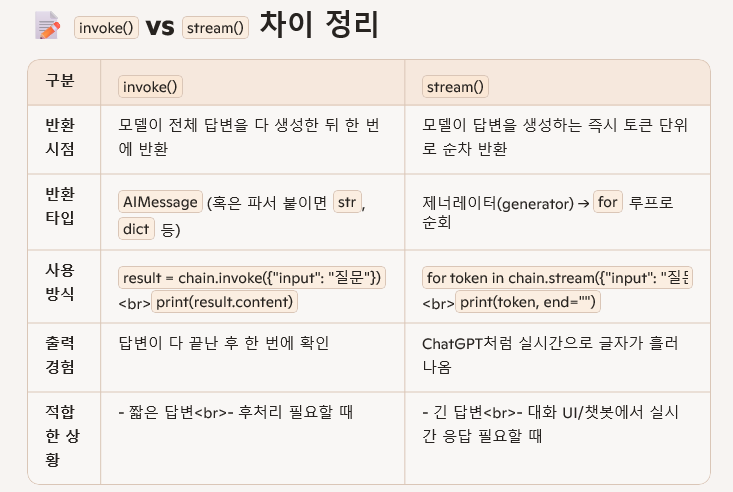

##### 2) Multiple Chains
* Multi Chain을 활용한 영화 추천 및 줄거리 요약

In [19]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

from pprint import pprint

prompt1 = ChatPromptTemplate.from_template("{genre} 장르에서 추천할 만한 영화 세 편 정도 소개시켜줘.")
prompt2 = ChatPromptTemplate.from_template("{movie} 추천한 영화 제목 먼저 알려주고 주연, 조연 이름 설명 후 영화 내용 설명 간단히 해줘.")

# OpenAI 모델 사용
llm = ChatOpenAI(
    api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    #model="meta-llama/llama-4-scout-17b-16e-instruct",  # Spring AI와 동일한 모델
    model="moonshotai/kimi-k2-instruct-0905",
    temperature=0.7
)

chain1 = prompt1 | llm | StrOutputParser()

# response = chain1.invoke({"genre": "드라마"})
# pprint(response)
# response = chain1.stream({"액션", "로맨스"})
# for token in response:
#     print(token, end="", flush=True)

chain2 = (
    {"movie" : chain1} | prompt2 | llm | StrOutputParser()
)

response = chain2.invoke({"genre": "로맨틱 코미디"})
pprint(response)

('1. 노팅힐 (1999)  \n'
 '주연: 휴 그랜트(윌리엄), 줄리아 로버츠(애나)  \n'
 '조연: 리암 니슨, 휴 본빌  \n'
 '줄거리: 런던 서점 주인 윌리엄에게 세계적 스타 애나가 우연히 들린 뒤 벌어지는 3일간의 현실 넘나드는 로맨스.\n'
 '\n'
 '2. 크레이지 리치 아시안 (2018)  \n'
 '주연: 콘스탄스 우(레이첼), 헨리 골딩(닉)  \n'
 '조연: 미셸 여, 젠정 탄  \n'
 '줄거리: 뉴욕대 교수 레이첼이 남자친구 따라 싱가포르에 가보니 그가 초호화 재벌 3세.\n'
 '\n'
 '3. 어바웃타임 (2013)  \n'
 '주연: 돔눈글리슨(팀), 레이처 맥아담스(매리)  \n'
 '조연: 빌 나이비  \n'
 '줄거리: 타임슬립 능력을 가진 팀이 운명의 여자 매리를 다시 만나며 깨닫는 ‘지금’의 소중함.')
